In [0]:
import pandas as pd
import numpy as np
import sklearn.model_selection
import warnings

warnings.filterwarnings('ignore', 'Solver terminated early.*')
%matplotlib inline

In [72]:
from google.colab import files
uploaded = files.upload()

In [0]:
import io

In [0]:
data_path = 'cleve.txt'

In [75]:
#df = pd.read_csv('cleve.txt', delim_whitespace=True, header=None, comment='%')
df = pd.read_csv(data_path, delim_whitespace=True, header=None, comment='%')
df.columns = ['age', 'sex', 'chest_pain', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 
                   'thal', 'target', 'health_status']

df

,age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,health_status
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48.0,male,notang,124.0,255.0,true,norm,175.0,fal,0.0,up,2.0,norm,buff,H
299,57.0,male,asympt,132.0,207.0,fal,norm,168.0,true,0.0,up,0.0,rev,buff,H
300,49.0,male,notang,118.0,149.0,fal,hyp,126.0,fal,0.8,up,3.0,norm,sick,S1
301,74.0,fem,abnang,120.0,269.0,fal,hyp,121.0,true,0.2,up,1.0,norm,buff,H


In [76]:
df.loc[df["sex"]=='fem', "sex"]= 0
df.loc[df["sex"]=='male', "sex"]= 1

df.loc[df["chest_pain"]=='angina', "chest_pain"]= 1
df.loc[df["chest_pain"]=='abnang', "chest_pain"]= 2
df.loc[df["chest_pain"]=='notang', "chest_pain"]= 3
df.loc[df["chest_pain"]=='asympt', "chest_pain"]= 4

df.loc[df["fbs"]=='fal', "fbs"]= 0
df.loc[df["fbs"]=='true', "fbs"]= 1

df.loc[df["restecg"]=='norm', "restecg"]= 0
df.loc[df["restecg"]=='abn', "restecg"]= 1
df.loc[df["restecg"]=='hyp', "restecg"]= 2

df.loc[df["exang"]=='fal', "exang"]= 0
df.loc[df["exang"]=='true', "exang"]= 1

df.loc[df["slope"]=='up', "slope"]= 1
df.loc[df["slope"]=='flat', "slope"]= 2
df.loc[df["slope"]=='down', "slope"]= 3

df.loc[df["thal"]=='norm', "thal"]= 3
df.loc[df["thal"]=='fix', "thal"]= 6
df.loc[df["thal"]=='rev', "thal"]= 7

df.loc[df["health_status"]=='H', "target"]= 0
df.loc[df["health_status"]=='S1', "target"]= 1
df.loc[df["health_status"]=='S2', "target"]= 2
df.loc[df["health_status"]=='S3', "target"]= 3
df.loc[df["health_status"]=='S4', "target"]= 4
df

,age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,health_status
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0.0,6,0,H
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,3,2,S2
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,7,1,S1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0.0,3,0,H
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0.0,3,0,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48.0,1,3,124.0,255.0,1,0,175.0,0,0.0,1,2.0,3,0,H
299,57.0,1,4,132.0,207.0,0,0,168.0,1,0.0,1,0.0,7,0,H
300,49.0,1,3,118.0,149.0,0,2,126.0,0,0.8,1,3.0,3,1,S1
301,74.0,0,2,120.0,269.0,0,2,121.0,1,0.2,1,1.0,3,0,H


In [77]:
# for col in df.columns:
#     print(df[col].value_counts())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    float64
 1   sex            303 non-null    object 
 2   chest_pain     303 non-null    object 
 3   trestbps       303 non-null    float64
 4   chol           303 non-null    float64
 5   fbs            303 non-null    object 
 6   restecg        303 non-null    object 
 7   thalach        303 non-null    float64
 8   exang          303 non-null    object 
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    object 
 11  ca             303 non-null    object 
 12  thal           303 non-null    object 
 13  target         303 non-null    object 
 14  health_status  303 non-null    object 
dtypes: float64(5), object(10)
memory usage: 35.6+ KB


Some ? marks have been discovered in the ca and thal data. These marks have been replaced with the most frequent values or words

In [78]:
df = df.replace(['?'], np.NaN)
# df = df.dropna(how='any')
df['ca']= pd.to_numeric(df['ca'], errors='coerce').fillna(0)
mode = df['ca'].mode()
df['ca'].fillna(mode)

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    2.0
299    0.0
300    3.0
301    1.0
302    1.0
Name: ca, Length: 303, dtype: float64

In [0]:

df = df.fillna(df['thal'].value_counts().index[0])

In [80]:
df['age']= df.age.astype('int64')
df['sex']= df.sex.astype('int64')
df['chest_pain']= df.chest_pain.astype('int64')
df['trestbps']= df.trestbps.astype('int64')
df['chol']= df.chol.astype('int64')
df['fbs']= df.fbs.astype('int64')
df['restecg']= df.restecg.astype('int64')
df['thalach']= df.thalach.astype('int64')
df['exang']= df.exang.astype('int64')
df['slope']= df.slope.astype('int64')

#df['ca']= pd.to_numeric(df['ca'], errors='coerce').fillna(0)
df['ca']= df.ca.astype('int64')
#df['thal']= pd.to_numeric(df['thal'], errors='coerce')
df['thal']= df.thal.astype('int64')
df['target']= df.target.astype('int64')
df = df.drop(['health_status'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    int64  
 1   sex         303 non-null    int64  
 2   chest_pain  303 non-null    int64  
 3   trestbps    303 non-null    int64  
 4   chol        303 non-null    int64  
 5   fbs         303 non-null    int64  
 6   restecg     303 non-null    int64  
 7   thalach     303 non-null    int64  
 8   exang       303 non-null    int64  
 9   oldpeak     303 non-null    float64
 10  slope       303 non-null    int64  
 11  ca          303 non-null    int64  
 12  thal        303 non-null    int64  
 13  target      303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [81]:
df

,age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48,1,3,124,255,1,0,175,0,0.0,1,2,3,0
299,57,1,4,132,207,0,0,168,1,0.0,1,0,7,0
300,49,1,3,118,149,0,2,126,0,0.8,1,3,3,1
301,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


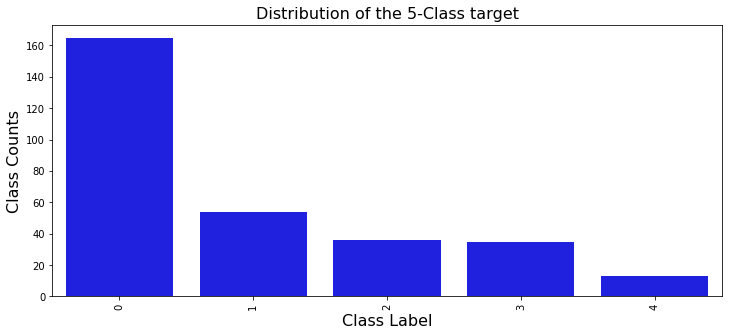

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.countplot(x=df.target, color='blue')
plt.title('Distribution of the 5-Class target', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='vertical');

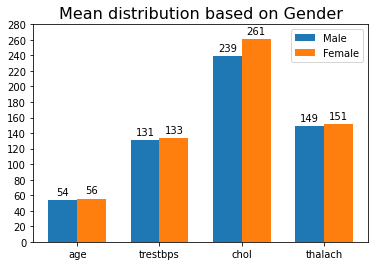

In [83]:

subjects = ['age', 'trestbps', 'chol', 'thalach']
dataset = df.groupby('sex')[subjects].mean()

indx = np.arange(len(subjects))
score_label = np.arange(0, 300, 20)
male = list(dataset.T[1])
female = list(dataset.T[0])

bar_width = 0.35

fig, ax = plt.subplots()
barMale = ax.bar(indx - bar_width/2, male, bar_width, label='Male')
barFemale = ax.bar(indx + bar_width/2, female, bar_width, label='Female')

# inserting x axis label
ax.set_xticks(indx)
ax.set_xticklabels(subjects)

# inserting y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

# inserting legend
ax.legend()

def insert_data_labels(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax.annotate('{0:.0f}'.format(bar.get_height()),
            xy=(bar.get_x() + bar.get_width() / 2, bar_height),
            xytext=(0, 3),
            textcoords='offset points',
            ha='center',
            va='bottom'
        )

insert_data_labels(barMale)
insert_data_labels(barFemale)

plt.title('Mean distribution based on Gender', fontsize=16)
plt.show()

In [84]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    int64  
 1   sex         303 non-null    int64  
 2   chest_pain  303 non-null    int64  
 3   trestbps    303 non-null    int64  
 4   chol        303 non-null    int64  
 5   fbs         303 non-null    int64  
 6   restecg     303 non-null    int64  
 7   thalach     303 non-null    int64  
 8   exang       303 non-null    int64  
 9   oldpeak     303 non-null    float64
 10  slope       303 non-null    int64  
 11  ca          303 non-null    int64  
 12  thal        303 non-null    int64  
 13  target      303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [0]:
from sklearn.preprocessing import StandardScaler

In [86]:
dfd = pd.get_dummies(df, columns =['sex', 'chest_pain', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
scaler = StandardScaler()
scalee = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dfd[scalee] = scaler.fit_transform(dfd[scalee])
X = dfd.drop(['target'], axis=1)
y = dfd['target']
X = np.asarray(X)
y = np.asarray(y)
print(X)
print(y)

[[ 0.9521966   0.76395577 -0.25633371 ...  0.          1.
   0.        ]
 [ 1.39335191  1.62064933  0.76791685 ...  1.          0.
   0.        ]
 [ 1.39335191 -0.66386682 -0.33363564 ...  0.          0.
   1.        ]
 ...
 [-0.59184697 -0.77809263 -1.87967422 ...  1.          0.
   0.        ]
 [ 2.16537369 -0.66386682  0.43938366 ...  1.          0.
   0.        ]
 [-0.04040284  1.62064933 -0.87474914 ...  1.          0.
   0.        ]]
[0 2 1 0 0 0 3 0 2 1 0 0 2 0 0 0 0 1 3 4 0 0 0 0 3 0 2 1 0 0 0 3 1 3 0 4 0
 0 0 1 4 0 4 0 0 0 0 2 0 1 1 1 1 0 0 2 0 1 0 2 2 1 0 2 1 0 3 1 1 1 0 1 0 0
 3 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 1 2 3 0 0 0 2 3 1 1 0 2 2 0 0 0 3 2 3 4 0
 3 0 0 0 0 4 3 1 0 0 1 0 1 0 1 4 0 0 0 0 0 0 4 3 1 1 1 2 0 1 0 3 0 0 1 0 4
 1 0 1 0 0 3 2 0 0 0 0 0 2 1 2 0 3 1 2 0 3 0 0 0 1 0 0 0 0 0 3 3 3 0 1 0 4
 0 3 1 0 0 0 0 0 0 0 0 3 1 2 0 0 0 3 2 0 2 3 2 1 0 0 0 0 0 2 0 2 2 1 3 0 0
 1 0 0 0 0 0 0 0 1 2 1 0 1 0 2 0 1 0 0 0 1 0 2 0 3 0 2 4 0 0 2 2 1 0 3 1 1
 2 3 1 0 2 0 0 1 0 0 1 0 0 0 0 

In [0]:
from sklearn.model_selection import cross_val_score

In [88]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


estimators = []

nb = GaussianNB()
rf = RandomForestClassifier()
log = LogisticRegression(multi_class='ovr')
svc = SVC(decision_function_shape='ovo')

estimators.append(('svm', svc))
estimators.append(('random', rf))
estimators.append(('naive', nb))
estimators.append(('log', log))

ensemble = VotingClassifier(estimators, voting='hard')
result1 = cross_val_score(ensemble, X, y, cv=10, scoring='accuracy')
print(result1)
print('Average accuracy using VotingClassifier: ', result1.mean())

[0.61290323 0.58064516 0.64516129 0.66666667 0.66666667 0.56666667
 0.53333333 0.5        0.56666667 0.56666667]
Average accuracy using VotingClassifier:  0.5905376344086021


In [89]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
estimators = []

nb = GaussianNB()
rf = RandomForestClassifier(n_estimators=42, max_depth=3, random_state=1, criterion='entropy')
log = LogisticRegression(C=10, solver='lbfgs', max_iter=2000)
ovr = OneVsRestClassifier(log, n_jobs=-1)
svc = SVC(C=100, gamma = 0.01, kernel = 'rbf', max_iter=2100)
ovo = OneVsOneClassifier(svc, n_jobs=-1)

estimators.append(('naive', nb))
estimators.append(('ovo', ovo))
estimators.append(('random', rf))
estimators.append(('ovr', ovr))
ensemble2 = VotingClassifier(estimators, voting='hard')
result2 = cross_val_score(ensemble2, X, y, cv=10, scoring='accuracy',n_jobs=-1)
print(result2)
print('Average accuracy using VotingClassifier: ', result2.mean())

[0.61290323 0.61290323 0.5483871  0.66666667 0.63333333 0.6
 0.53333333 0.6        0.56666667 0.63333333]
Average accuracy using VotingClassifier:  0.6007526881720429


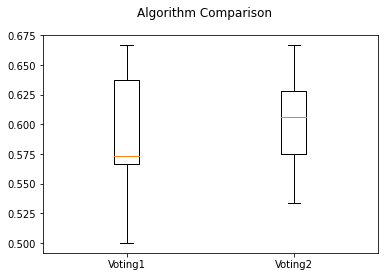

In [90]:
models = []
models.append(('Voting1', result1))
models.append(('Voting2', result2))

results = []
names = []

for name, model in models:
    results.append(model)
    names.append(name)
    
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [0]:
# fit model to data
ensemble2(X, y)